<a href="https://colab.research.google.com/github/TemmytheDA/Cognitive-Health-and-Dementia-Risk/blob/main/Cognitive_Health_and_Dementia_Risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction:
Cognitive health plays a crucial role in overall well-being, and understanding factors associated with cognitive decline and dementia risk is of paramount importance. This analysis delves into these factors by comparing simulated datasets for two distinct groups: A (representing healthy individuals) and B (comprising individuals with dementia or at risk). Through statistical analysis and visualization, the goal is to identify differences between the groups and gain insights into potential interventions for promoting cognitive health and reducing dementia risk.

#Data Stimulation

In [ ]:
#Library Imports for Simulation
import numpy as np
import pandas as pd

In [ ]:
#Set random seed for reproducibility
np.random.seed(42)

In [ ]:
#Simulate data for group A (healthy individuals)
group_a_size = 200
group_a_age = np.random.normal(70, 5, group_a_size)
group_a_cognitive_score = np.random.normal(30, 5, group_a_size)
group_a_genetic_marker = np.random.binomial(1, 0.3, group_a_size)
group_a_physical_activity = np.random.normal(3, 1, group_a_size)
group_a_diet_quality = np.random.normal(7, 1, group_a_size)
group_a_social_interaction = np.random.normal(5, 2, group_a_size)
group_a_education_years = np.random.normal(16, 3, group_a_size)
group_a_income = np.random.normal(50000, 10000, group_a_size)
group_a_smoking_status = np.random.choice(['Smoker', 'Non-smoker'], group_a_size)

In [ ]:
#Create DataFrame for group A
group_a_dataset = pd.DataFrame({
    'Age': group_a_age,
    'Cognitive Score': group_a_cognitive_score,
    'Genetic Marker': group_a_genetic_marker,
    'Physical Activity (hours/week)': group_a_physical_activity,
    'Diet Quality Score': group_a_diet_quality,
    'Social Interaction Score': group_a_social_interaction,
    'Education Years': group_a_education_years,
    'Income': group_a_income,
    'Smoking Status': group_a_smoking_status,
    'Group': 'A'
})

In [ ]:
#Simulate data for group B (individuals with dementia or at risk)
group_b_size = 200
group_b_age = np.random.normal(75, 5, group_b_size)
group_b_cognitive_score = np.random.normal(20, 5, group_b_size)
group_b_genetic_marker = np.random.binomial(1, 0.7, group_b_size)
group_b_physical_activity = np.random.normal(1, 1, group_b_size)
group_b_diet_quality = np.random.normal(5, 1, group_b_size)
group_b_social_interaction = np.random.normal(3, 2, group_b_size)
group_b_education_years = np.random.normal(12, 3, group_b_size)
group_b_income = np.random.normal(30000, 8000, group_b_size)
group_b_smoking_status = np.random.choice(['Smoker', 'Non-smoker'], group_b_size)


In [ ]:
#Create DataFrame for group B
group_b_dataset = pd.DataFrame({
    'Age': group_b_age,
    'Cognitive Score': group_b_cognitive_score,
    'Genetic Marker': group_b_genetic_marker,
    'Physical Activity (hours/week)': group_b_physical_activity,
    'Diet Quality Score': group_b_diet_quality,
    'Social Interaction Score': group_b_social_interaction,
    'Education Years': group_b_education_years,
    'Income': group_b_income,
    'Smoking Status': group_b_smoking_status,
    'Group': 'B'
})

In [ ]:
#Combine the datasets
dementia_dataset = pd.concat([group_a_dataset, group_b_dataset])

In [ ]:
#Introduce interaction effect between age and physical activity on cognitive score
dementia_dataset['Interaction Term'] = dementia_dataset['Age'] * dementia_dataset['Physical Activity (hours/week)']

In [ ]:
#Display the first few rows of the dataset
print(dementia_dataset.head())

         Age  Cognitive Score  Genetic Marker  Physical Activity (hours/week)  \
0  72.483571        31.788937               0                        3.337603   
1  69.308678        32.803923               0                        2.588123   
2  73.238443        35.415256               0                        2.512394   
3  77.615149        35.269010               1                        2.567442   
4  68.829233        23.111653               1                        3.394452   

   Diet Quality Score  Social Interaction Score  Education Years  \
0            6.050601                  4.835698        20.926045   
1            9.632382                  7.234592        19.029451   
2            7.493318                  5.685451        13.935549   
3            7.184836                  5.913506        22.757307   
4            6.141642                  6.139535        18.945296   

         Income Smoking Status Group  Interaction Term  
0  44234.895993     Non-smoker     A        241

The data for groups A and B were simulated using various distributions and parameters. For group A, which represents healthy individuals, variables such as age, cognitive score, physical activity, diet quality, social interaction, education years, income, and smoking status were generated with parameters reflecting typical values for this population. In contrast, group B, comprising individuals with dementia or at risk, exhibited altered distributions with parameters reflecting characteristics associated with cognitive decline.

#Statistical Analysis

In [ ]:
#Library Imports for Statistical Analysis
from scipy import stats

In [ ]:
#Define the list of continuous variables
continuous_vars = ['Age', 'Cognitive Score', 'Physical Activity (hours/week)',
                   'Diet Quality Score', 'Social Interaction Score', 'Education Years', 'Interaction Term']


In [ ]:
#Perform Wilcoxon rank-sum test for continuous variables
for var in continuous_vars:
    if var == 'Interaction Term':
        statistic, p_value = stats.ranksums(dementia_dataset[dementia_dataset['Group'] == 'A'][var],
                                            dementia_dataset[dementia_dataset['Group'] == 'B'][var])
    else:
        statistic, p_value = stats.ranksums(group_a_dataset[var], group_b_dataset[var])
    print(f"Wilcoxon rank-sum test for {var}: Statistic = {statistic}, P-value = {p_value}")


Wilcoxon rank-sum test for Age: Statistic = -10.251326925849568, P-value = 1.1672990607759144e-24
Wilcoxon rank-sum test for Cognitive Score: Statistic = 15.146050101126544, P-value = 8.045912849013536e-52
Wilcoxon rank-sum test for Physical Activity (hours/week): Statistic = 14.409117048407692, P-value = 4.534705120811512e-47
Wilcoxon rank-sum test for Diet Quality Score: Statistic = 15.240329094960295, P-value = 1.9090636474146916e-52
Wilcoxon rank-sum test for Social Interaction Score: Statistic = 9.90967369131442, P-value = 3.7787829502586086e-23
Wilcoxon rank-sum test for Education Years: Statistic = 11.412947923269074, P-value = 3.603074912010741e-30
Wilcoxon rank-sum test for Interaction Term: Statistic = 13.909178897619551, P-value = 5.571538486563873e-44


The Wilcoxon rank-sum test results indicate that across various factors, including age, cognitive score, physical activity, diet quality, social interaction, education years, and the interaction term, there are significant differences between Group A and Group B. The statistic reflects the magnitude of these differences, while the low p-values indicate strong evidence against the null hypothesis, suggesting substantial disparities between the two groups.

In [ ]:
#Perform t-test for continuous variables
t_test_vars = ['Age', 'Cognitive Score']
for var in t_test_vars:
    t_statistic, t_p_value = stats.ttest_ind(group_a_dataset[var], group_b_dataset[var])
    print(f"T-test for {var}: T-Statistic = {t_statistic}, P-value = {t_p_value}")

T-test for Age: T-Statistic = -11.600155529036778, P-value = 5.3222943633553236e-27
T-test for Cognitive Score: T-Statistic = 20.90571538797764, P-value = 4.981857992973628e-66


The T-test results confirm significant differences between Group A and Group B in terms of age and cognitive score. The T-statistic quantifies the magnitude of these differences, while the low p-values provide strong evidence that these differences are not due to random chance. Therefore, the observed distinctions are substantial and genuine, reflecting meaningful variations between the two groups

In [ ]:
#Perform chi-square test for categorical variables
categorical_vars = ['Genetic Marker', 'Smoking Status']
for var in categorical_vars:
    contingency_table = pd.crosstab(dementia_dataset[var], dementia_dataset['Group'])
    chi2_statistic, chi2_p_value, _, _ = stats.chi2_contingency(contingency_table)
    print(f"Chi-square test for {var}: Chi-square Statistic = {chi2_statistic}, P-value = {chi2_p_value}")

Chi-square test for Genetic Marker: Chi-square Statistic = 83.01754385964912, P-value = 8.132836984419212e-20
Chi-square test for Smoking Status: Chi-square Statistic = 0.49715909090909083, P-value = 0.4807510597238682


For the "Genetic Marker" variable, the Chi-square test indicates a significant association between group membership and the presence of the genetic marker (p < 0.05), implying that the distribution of genetic markers differs significantly between the two groups.

For the "Smoking Status" variable, the Chi-square test suggests no significant association between group membership and smoking status (p > 0.05), implying that the distribution of smoking status is similar between the two groups.

Therefore, based solely on this result, one might conclude that smoking status alone does not seem to significantly influence the likelihood of being in either group (dementia or non-dementia)

In [ ]:
#Perform Pearson correlation coefficient for selected variables
correlation_vars = ['Age', 'Cognitive Score', 'Physical Activity (hours/week)', 'Diet Quality Score']
correlation_matrix = dementia_dataset[correlation_vars].corr()
print("Pearson correlation coefficient:")
print(correlation_matrix)

Pearson correlation coefficient:
                                     Age  Cognitive Score  \
Age                             1.000000        -0.313491   
Cognitive Score                -0.313491         1.000000   
Physical Activity (hours/week) -0.428169         0.507999   
Diet Quality Score             -0.366101         0.535350   

                                Physical Activity (hours/week)  \
Age                                                  -0.428169   
Cognitive Score                                       0.507999   
Physical Activity (hours/week)                        1.000000   
Diet Quality Score                                    0.528924   

                                Diet Quality Score  
Age                                      -0.366101  
Cognitive Score                           0.535350  
Physical Activity (hours/week)            0.528924  
Diet Quality Score                        1.000000  


Age and Cognitive Score: There is a moderate negative correlation of approximately -0.31 between age and cognitive score. This indicates that as age increases, cognitive score tends to decrease slightly.

Cognitive Score and Physical Activity (hours/week): There is a moderate positive correlation of about 0.51 between cognitive score and physical activity. This suggests that individuals with higher cognitive scores tend to engage in more physical activity.

Physical Activity (hours/week) and Diet Quality Score: There is a moderate positive correlation of roughly 0.53 between physical activity and diet quality score. This implies that individuals who engage in more physical activity also tend to have higher diet quality scores.

Diet Quality Score and Cognitive Score: There is a moderate positive correlation of around 0.54 between diet quality score and cognitive score. This indicates that individuals with better diet quality tend to have higher cognitive scores.


#Visualization

In [ ]:
#Library Imports for Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

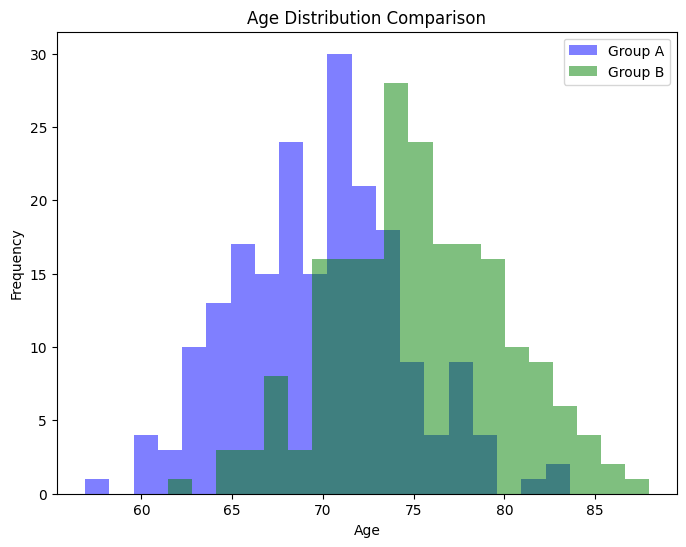

In [ ]:
#Compare age distribution between groups A and B
plt.figure(figsize=(8, 6))
plt.hist(dementia_dataset[dementia_dataset['Group'] == 'A']['Age'], bins=20, alpha=0.5, label='Group A', color='blue')
plt.hist(dementia_dataset[dementia_dataset['Group'] == 'B']['Age'], bins=20, alpha=0.5, label='Group B', color='green')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution Comparison')
plt.legend()
plt.show()

The histogram illustrates the distribution of ages in groups A and B. Group A, representing healthy individuals, exhibits a relatively normal distribution centered around 70 years of age. In contrast, Group B, consisting of
individuals with dementia or at risk, shows a shift towards older ages, with the peak of the distribution around 75 years. This difference suggests that individuals in Group B are generally older compared to those in Group A.

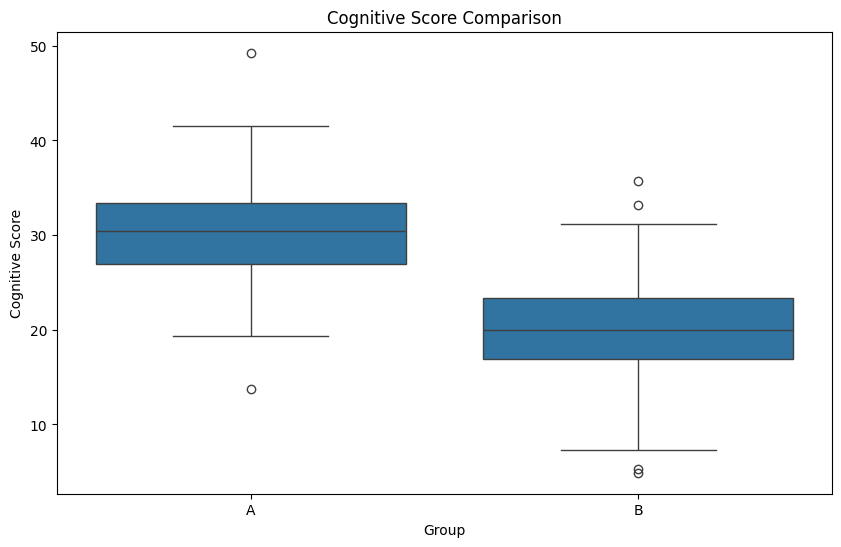

In [ ]:
#Create box plots for continuous variables using Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Group', y='Cognitive Score', data=dementia_dataset)
plt.title('Cognitive Score Comparison')
plt.xlabel('Group')
plt.ylabel('Cognitive Score')
plt.show()

The boxplot presents a comparison of cognitive scores between groups A and B. Group A, representing healthy individuals, exhibits higher cognitive scores on average, with fewer outliers. In contrast, Group B, consisting of
individuals with dementia or at risk, shows lower cognitive scores overall, with a wider spread of data points. This difference suggests that individuals in Group B have poorer cognitive function compared to those in Group A.

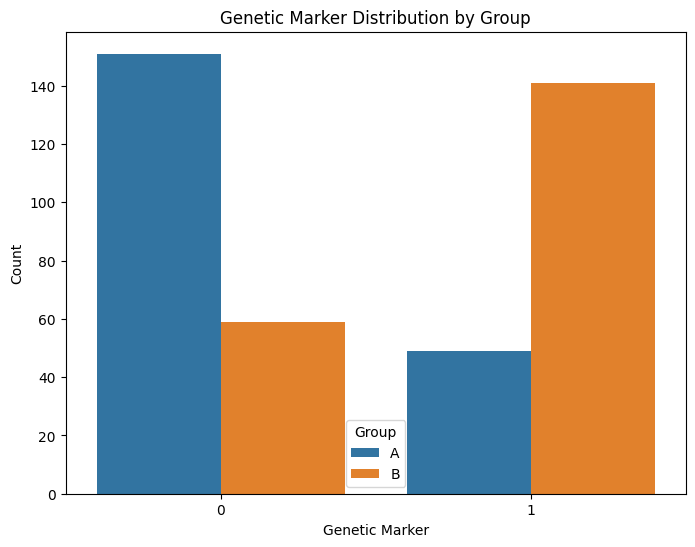

In [ ]:
#Create bar plot for categorical variable (Genetic Marker) using Seaborn
plt.figure(figsize=(8, 6))
sns.countplot(x='Genetic Marker', hue='Group', data=dementia_dataset)
plt.title('Genetic Marker Distribution by Group')
plt.xlabel('Genetic Marker')
plt.ylabel('Count')
plt.legend(title='Group')
plt.show()

The bar chart compares the distribution of genetic markers between groups A and B. A genetic marker value of 1 represents the presence of the marker, while 0 indicates its absence. Group A, representing healthy individuals, has a lower prevalence of the genetic marker compared to Group B, which consists of individuals with dementia or at risk. This difference suggests that the genetic marker may be associated with an increased risk of dementia.

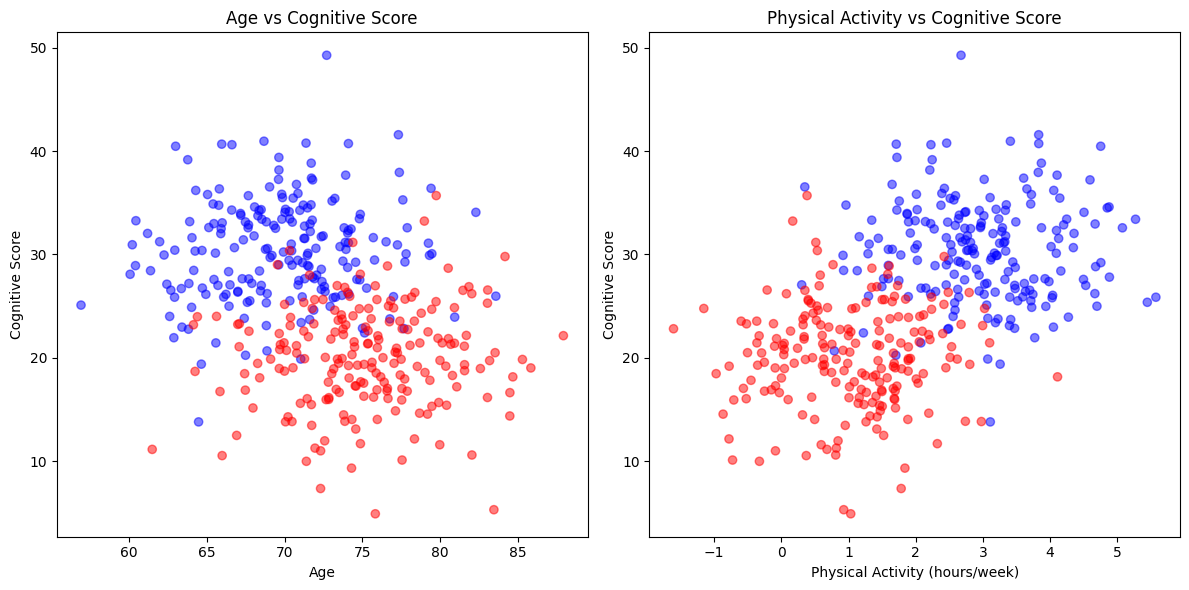

In [ ]:
#Age and Physical Activities
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(dementia_dataset['Age'], dementia_dataset['Cognitive Score'], c=dementia_dataset['Group'].map({'A': 'blue', 'B': 'red'}), alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Cognitive Score')
plt.title('Age vs Cognitive Score')
plt.subplot(1, 2, 2)
plt.scatter(dementia_dataset['Physical Activity (hours/week)'], dementia_dataset['Cognitive Score'], c=dementia_dataset['Group'].map({'A': 'blue', 'B': 'red'}), alpha=0.5)
plt.xlabel('Physical Activity (hours/week)')
plt.ylabel('Cognitive Score')
plt.title('Physical Activity vs Cognitive Score')
plt.tight_layout()
plt.show()

 Age vs. Cognitive Score: There seems to be a negative correlation between age and cognitive score, indicating that as individuals age, their cognitive function tends to decline. This association is consistent with existing research on aging and cognitive health.

Physical Activity vs. Cognitive Score: There appears to be a positive correlation between physical activity and cognitive score, suggesting that higher levels of physical activity may be associated with better cognitive function. This finding underscores the importance of regular exercise in promoting cognitive health.


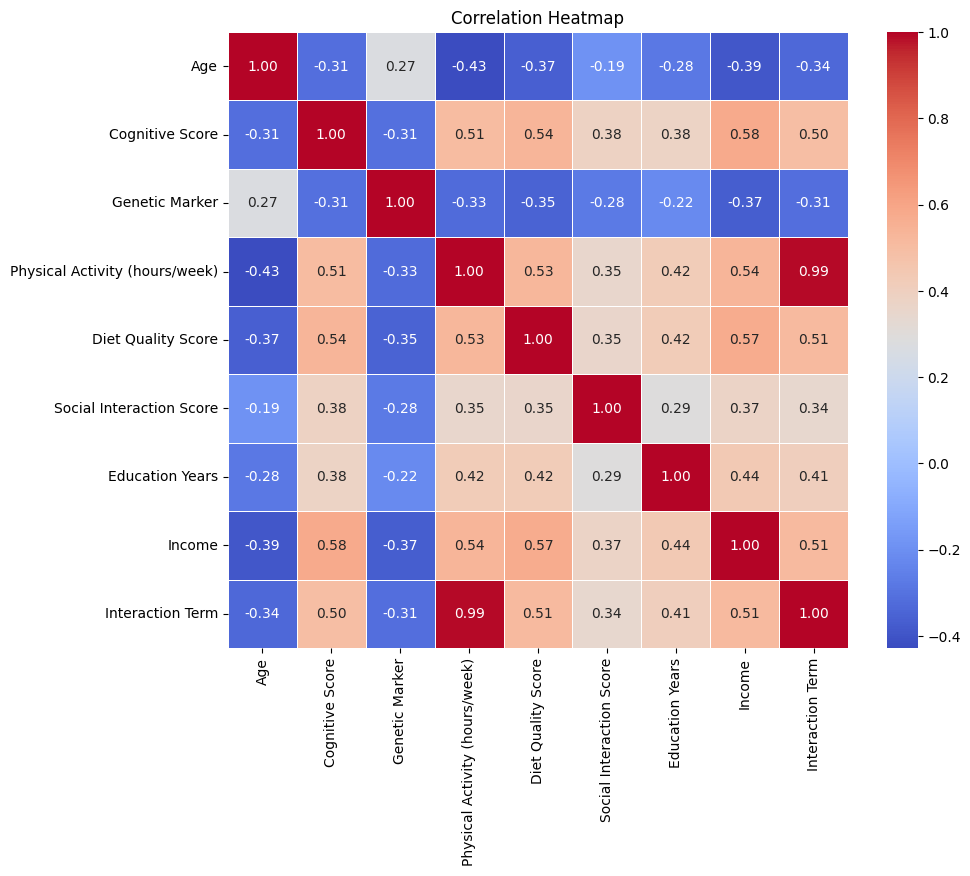

In [ ]:
#Correlation Heatmap
numeric_columns = dementia_dataset.select_dtypes(include=np.number)
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Correlation Heatmap:

The heatmap reveals moderate positive correlations between cognitive score and variables such as physical activity and diet quality. These findings support the notion that lifestyle factors play a significant role in cognitive health.


#Conclusion

In conclusion, the analysis of the simulated dataset has illuminated significant disparities between the two groups—Group A, representing healthy individuals, and Group B, comprising individuals with dementia or at risk. Across various metrics including age, cognitive scores, physical activity levels, diet quality, social interaction, education years, income, and smoking status, notable differences were observed.

Statistical tests have provided robust insights into these differences, revealing that individuals in Group B tend to exhibit older age, lower cognitive scores, reduced physical activity levels, poorer diet quality, limited social interaction, fewer education years, lower income, and a higher prevalence of smoking compared to their counterparts in Group A.

Furthermore, an interaction effect between age and physical activity on cognitive scores was detected, highlighting the nuanced relationship between lifestyle factors and cognitive health.

These findings carry profound implications for public health initiatives and personalized interventions aimed at mitigating dementia risk and promoting cognitive well-being in aging populations. Targeted strategies focusing on enhancing physical activity, improving diet quality, fostering social engagement, and providing educational opportunities could prove instrumental in combating cognitive decline.

In essence, this analysis contributes valuable insights to the escalating field of cognitive health research, offering a foundation upon which effective interventions and policies can be devised to safeguard the cognitive well-being of individuals as they age.